# Inverse Interpolation

Let's first load the necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
import sympy as sym

And we need the functions for interpolation.

We define the functions of interest

In [2]:
def cardinal(xdata, x):
    """
    cardinal(xdata, x): 
    In: xdata, array with the nodes x_i.
        x, array or a scalar of values in which the cardinal functions are evaluated.
    Return: l: a list of arrays of the cardinal functions evaluated in x. 
    """
    n = len(xdata)              # Number of evaluation points x
    l = []
    for i in range(n):          # Loop over the cardinal functions
        li = np.ones(len(x))
        for j in range(n):      # Loop to make the product for l_i
            if i is not j:
                li = li*(x-xdata[j])/(xdata[i]-xdata[j])
        l.append(li)            # Append the array to the list            
    return l

In [3]:
def lagrange(ydata, l):
    """
    lagrange(ydata, l):
    In: ydata, array of the y-values of the interpolation points.
         l, a list of the cardinal functions, given by `cardinal(xdata, x)`
    Return: An array with the interpolation polynomial (evaluated at `x`). 
    """
    poly = 0                        
    for i in range(len(ydata)):
        poly = poly + ydata[i]*l[i]  
    return poly

We now define the function of interest

In [4]:
def f(x):
    return x**3-7

In [5]:
a = 1.5
b = 2.0
x = np.linspace(a,b,401)
y = f(x)
n=2

**a)** The interpolation needs to be performed into `y` instead `x`.

In [28]:
xdata = np.linspace(a,b,n+1) 
ydata = f(xdata)

l = cardinal(ydata,y)
p = lagrange(xdata,l)

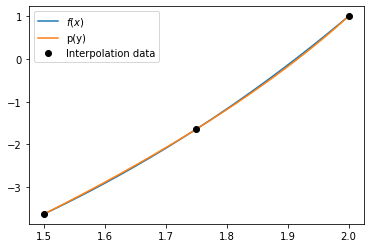

In [29]:

plt.plot(x,y,p,y, xdata, ydata, "ko")
plt.legend(['$f(x)$', 'p(y)', 'Interpolation data'])

**b)**  We now use $(n+1)$ equidistant nodes to compute our polynomial  𝑝

In [12]:
xdata2 = np.linspace(a,b,4+1) #n=4
ydata2 = f(xdata2)

l2 = cardinal(ydata2,y)
p2 = lagrange(xdata2,l2)

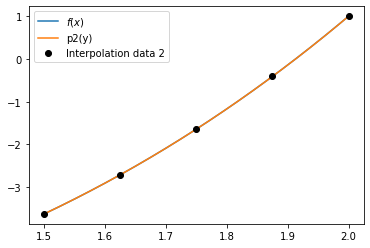

In [31]:

plt.plot(x,y,p2,y, xdata2, ydata2, "ko")
plt.legend(['$f(x)$', 'p2(y)', 'Interpolation data 2'])

In [14]:
xdata3 = np.linspace(a,b,8+1) #n=8
ydata3 = f(xdata3)

l3 = cardinal(ydata3,y)
p3 = lagrange(xdata3,l3)

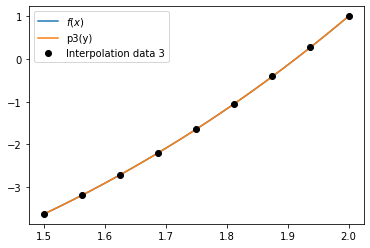

In [32]:

plt.plot(x,y,p3,y, xdata3, ydata3, "ko")
plt.legend(['$f(x)$', 'p3(y)', 'Interpolation data 3'])

In [16]:
xdata4 = np.linspace(a,b,16+1) #n=16
ydata4 = f(xdata4)

l4 = cardinal(ydata4,y)
p4 = lagrange(xdata4,l4)

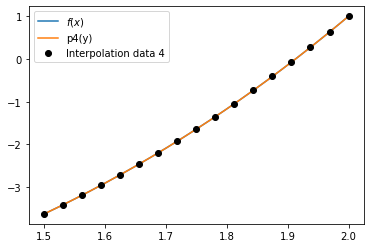

In [33]:
plt.plot(x,y,p4,y, xdata4, ydata4, "ko")
plt.legend(['$f(x)$', 'p4(y)', 'Interpolation data 4'])

**c)** We now use the spline interpolation to repeat the part a)

Text(0.5, 0, 'x')

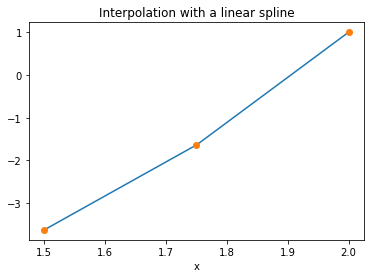

In [30]:

# Compute the interpolating linear spline using built in numpy functions
s = np.interp(y,ydata,xdata)

plt.plot(s, y)                     # Plot the linear spline
plt.plot(xdata, ydata, 'o')        # Plot the interpolation points 
plt.title('Interpolation with a linear spline')
plt.xlabel('x')